Epoch 1/50
850/850 - 5s - loss: 9.5013e-04 - 5s/epoch - 6ms/step
Epoch 2/50
850/850 - 2s - loss: 3.4081e-04 - 2s/epoch - 3ms/step
Epoch 3/50
850/850 - 2s - loss: 2.5872e-04 - 2s/epoch - 3ms/step
Epoch 4/50
850/850 - 2s - loss: 2.2469e-04 - 2s/epoch - 3ms/step
Epoch 5/50
850/850 - 3s - loss: 1.9955e-04 - 3s/epoch - 3ms/step
Epoch 6/50
850/850 - 3s - loss: 2.0711e-04 - 3s/epoch - 3ms/step
Epoch 7/50
850/850 - 3s - loss: 1.8318e-04 - 3s/epoch - 3ms/step
Epoch 8/50
850/850 - 3s - loss: 1.7711e-04 - 3s/epoch - 3ms/step
Epoch 9/50
850/850 - 2s - loss: 1.7285e-04 - 2s/epoch - 3ms/step
Epoch 10/50
850/850 - 2s - loss: 1.6285e-04 - 2s/epoch - 3ms/step
Epoch 11/50
850/850 - 3s - loss: 1.5534e-04 - 3s/epoch - 3ms/step
Epoch 12/50
850/850 - 3s - loss: 1.5445e-04 - 3s/epoch - 3ms/step
Epoch 13/50
850/850 - 3s - loss: 1.4038e-04 - 3s/epoch - 3ms/step
Epoch 14/50
850/850 - 3s - loss: 1.3447e-04 - 3s/epoch - 3ms/step
Epoch 15/50
850/850 - 2s - loss: 1.3797e-04 - 2s/epoch - 3ms/step
Epoch 16/50
850/850

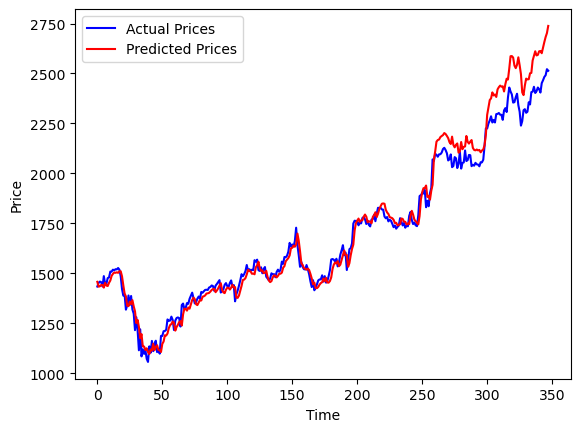

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load historical stock price data (replace 'your_data.csv' with your data file)
data = pd.read_csv('GOOG.csv')

# Extract the 'Close' column as the target variable
prices = data['close'].values.astype(float)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
prices = scaler.fit_transform(prices.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(prices) * 0.7)
test_size = len(prices) - train_size
train_data, test_data = prices[0:train_size, :], prices[train_size:len(prices), :]

# Create sequences of data for the LSTM model
def create_sequences(data, look_back):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 30  # Number of previous days' prices to consider
train_X, train_Y = create_sequences(train_data, look_back)
test_X, test_Y = create_sequences(test_data, look_back)

# Reshape the data for LSTM input (samples, time steps, features)
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

# Build the LSTM model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, input_shape=(1, look_back), activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(train_X, train_Y, epochs=50, batch_size=1, verbose=2)

# Make predictions on the test data
test_predictions = model.predict(test_X)
test_predictions = scaler.inverse_transform(test_predictions)
test_Y = scaler.inverse_transform([test_Y])

# Calculate root mean squared error (RMSE) as a measure of prediction accuracy
rmse = np.sqrt(mean_squared_error(test_Y[0], test_predictions[:,0]))
print(f"Root Mean Squared Error: {rmse}")

# Plot the actual vs. predicted prices
plt.plot(test_Y[0], label='Actual Prices', color='blue')
plt.plot(test_predictions[:,0], label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
